<center><h1 style="color:red">Engg Tech - KNN</h1></center>
<h2 style="font-family:verdana">Follow us on: </h2>
    
        Instagram: https://www.instagram.com/engg_tech.ai/

        Facebook:  https://www.facebook.com/enggtechai

        Youtube:   https://www.youtube.com/c/EnggtecH

        Github:    https://www.github.com/hmgtech
    

<img src="knn.jpg" height=400 width="600">

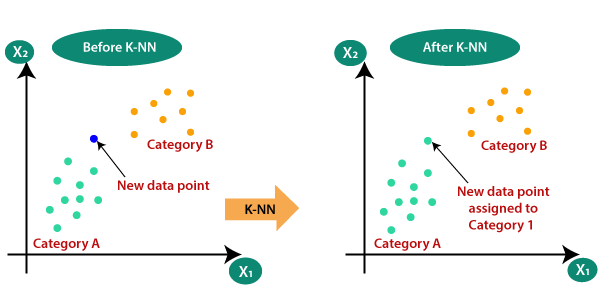

Common choices include the Euclidean distance:

Manhattan/city block distance:

How does K-NN work?<br>
The K-NN working can be explained on the basis of the below algorithm:<br>

Step-1: Select the number K of the neighbors<br>
Step-2: Calculate the Euclidean distance of K number of neighbors<br>
Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.<br>
Step-4: Among these k neighbors, count the number of the data points in each category.<br>
Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.<br>
Step-6: Our model is ready.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [2]:
def image_to_feature_vector(image, size=(32, 32)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [5]:
def extract_color_histogram(image, bins=(8, 8, 8)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
	# handle normalizing the histogram if we are using OpenCV 2.4.X
	if imutils.is_cv2():
		hist = cv2.normalize(hist)
	# otherwise, perform "in place" normalization in OpenCV 3 (I
	# personally hate the way this is done
	else:
		cv2.normalize(hist, hist)
	# return the flattened histogram as the feature vector
	return hist.flatten()

In [6]:
dataset = 'train/'

In [16]:
# grab the list of images that we'll be describing
print("[INFO] describing images...")
imagePaths = list(paths.list_images(dataset))
print(imagePaths)
# initialize the raw pixel intensities matrix, the features matrix,
# and labels list
rawImages = []
features = []
labels = []

[INFO] describing images...
['train/cat.0.jpg', 'train/cat.1.jpg', 'train/cat.10.jpg', 'train/cat.100.jpg', 'train/cat.1000.jpg', 'train/cat.10000.jpg', 'train/cat.10001.jpg', 'train/cat.10002.jpg', 'train/cat.10003.jpg', 'train/cat.10004.jpg', 'train/cat.10005.jpg', 'train/cat.10006.jpg', 'train/cat.10007.jpg', 'train/cat.10008.jpg', 'train/cat.10009.jpg', 'train/cat.1001.jpg', 'train/cat.10010.jpg', 'train/cat.10011.jpg', 'train/cat.10012.jpg', 'train/cat.10013.jpg', 'train/cat.10014.jpg', 'train/cat.10015.jpg', 'train/cat.10016.jpg', 'train/cat.10017.jpg', 'train/cat.10018.jpg', 'train/cat.10019.jpg', 'train/cat.1002.jpg', 'train/cat.10020.jpg', 'train/cat.10021.jpg', 'train/cat.10022.jpg', 'train/cat.10023.jpg', 'train/cat.10024.jpg', 'train/cat.10025.jpg', 'train/cat.10026.jpg', 'train/cat.10027.jpg', 'train/cat.10028.jpg', 'train/cat.10029.jpg', 'train/cat.1003.jpg', 'train/cat.10030.jpg', 'train/cat.10031.jpg', 'train/cat.10032.jpg', 'train/cat.10033.jpg', 'train/cat.10034.jpg',

<h3>What exactly is a histogram?</h3><br> A histogram represents the distribution of colors in an image. It can be visualized as a graph (or plot) that gives a high-level intuition of the intensity (pixel value) distribution. We are going to assume a RGB color space in this example, so these pixel values will be in the range of 0 to 255. If you are working in a different color space, the pixel range may be different.
<br>
When plotting the histogram, the X-axis serves as our “bins”. 

If we construct a histogram with 256 bins, then we are effectively counting the number of times each pixel value occurs. In contrast, if we use only 2 (equally spaced) bins, then we are counting the number of times a pixel is in the range [0, 128) or [128, 255]. The number of pixels binned to the X-axis value is then plotted on the Y-axis.

cv2.calcHist(images, channels, mask, histSize, ranges)<br><br>
images: This is the image that we want to compute a histogram for. Wrap it as a list: [myImage].<br><br>
channels: A list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0]. To compute a histogram for all three red, green, and blue channels, the channels list would be [0, 1, 2].<br><br>
mask: I haven’t covered masking yet in this video yet, but essentially, a mask is a uint8  image with the same shape as our original image, where pixels with a value of zero are ignored and pixels with a value greater than zero are included in the histogram computation. Using masks allow us to only compute a histogram for a particular region of an image. For now, we’ll just use a value of None for the mask.<br><br>
histSize: This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32, 32, 32].<br><br>
ranges: The range of possible pixel values. Normally, this is [0, 256] for each channel, but if you are using a color space other than RGB (such as HSV), the ranges might be different.

In [17]:
for (i, imagePath) in enumerate(imagePaths):
	# load the image and extract the class label (assuming that our
	# path as the format: /path/to/dataset/{class}.{image_num}.jpg
	image = cv2.imread(imagePath)
	label = imagePath.split(os.path.sep)[-1].split(".")[0]
	# extract raw pixel intensity "features", followed by a color
	# histogram to characterize the color distribution of the pixels
	# in the image
	pixels = image_to_feature_vector(image)
	hist = extract_color_histogram(image)
	# update the raw images, features, and labels matricies,
	# respectively
	rawImages.append(pixels)
	features.append(hist)
	labels.append(label)
	# show an update every 1,000 images
	if i > 0 and i % 1000 == 0:
		print("[INFO] processed {}/{}".format(i, len(imagePaths)))

[INFO] processed 1000/25000
[INFO] processed 2000/25000
[INFO] processed 3000/25000
[INFO] processed 4000/25000
[INFO] processed 5000/25000
[INFO] processed 6000/25000
[INFO] processed 7000/25000
[INFO] processed 8000/25000
[INFO] processed 9000/25000
[INFO] processed 10000/25000
[INFO] processed 11000/25000
[INFO] processed 12000/25000
[INFO] processed 13000/25000
[INFO] processed 14000/25000
[INFO] processed 15000/25000
[INFO] processed 16000/25000
[INFO] processed 17000/25000
[INFO] processed 18000/25000
[INFO] processed 19000/25000
[INFO] processed 20000/25000
[INFO] processed 21000/25000
[INFO] processed 22000/25000
[INFO] processed 23000/25000
[INFO] processed 24000/25000


In [18]:
# matrix and features matrix
rawImages = np.array(rawImages)
features = np.array(features)
labels = np.array(labels)
print("[INFO] pixels matrix: {:.2f}MB".format(
	rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(
	features.nbytes / (1024 * 1000.0)))

[INFO] pixels matrix: 75.00MB
[INFO] features matrix: 50.00MB


In [19]:
# partition the data into training and testing splits, using 75%
# of the data for training and the remaining 25% for testing
(trainRI, testRI, trainRL, testRL) = train_test_split(
	rawImages, labels, test_size=0.25, random_state=42)
(trainFeat, testFeat, trainLabels, testLabels) = train_test_split(
	features, labels, test_size=0.25, random_state=42)

In [22]:
# train and evaluate a k-NN classifer on the raw pixel intensities
print("[INFO] evaluating raw pixel accuracy...")
model = KNeighborsClassifier(n_neighbors=1,
	n_jobs=-1)
model.fit(trainRI, trainRL)
acc = model.score(testRI, testRL)
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))

[INFO] evaluating raw pixel accuracy...
[INFO] raw pixel accuracy: 54.56%


In [24]:
# train and evaluate a k-NN classifer on the histogram
# representations
print("[INFO] evaluating histogram accuracy...")
model = KNeighborsClassifier(n_neighbors=1,
	n_jobs=-1)
model.fit(trainFeat, trainLabels)
acc = model.score(testFeat, testLabels)
print("[INFO] histogram accuracy: {:.2f}%".format(acc * 100))

[INFO] evaluating histogram accuracy...
[INFO] histogram accuracy: 57.42%


In [25]:
import joblib

In [26]:
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [27]:
loaded_model = joblib.load(filename)

In [32]:
image = 'test/cat.jpg'
loaded_model.predict(image)

ValueError: Expected 2D array, got scalar array instead:
array=test/cat.jpg.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [54]:
image = cv2.imread("test/cat.jpg")

image = extract_color_histogram(image).reshape(1,-1)

print(loaded_model.predict(image))

['train/dog']


<h1>INTRO - REAL TIME DETECTION!!</h1

In [ ]:
import urllib
import urllib.request
import cv2

In [ ]:
url = "http://192.168.43.1:8080/shot.jpg"
cam = cv2.VideoCapture('http://192.168.43.1:8080/shot.jpg')
imgResp = urllib.request.urlopen(url)

while True:
	ret,frame = cam.read() 
	imgResp = urllib.request.urlopen(url)
	imgnp = np.array(bytearray(imgResp.read()),dtype=np.uint8)
	img = cv2.imdecode(imgnp,-1)
	org = img
    image = extract_color_histogram(image).reshape(1,-1)
    print(loaded_model.predict(image))

	cv2.imshow('test', org)
	if cv2.waitKey(1) == 27: ##Check whether user has pressed esc key or not
		break